# Bayes'sche Inferenz: Implementierung mit PyMC3

## Beispiel: Münzwurf

Eine Münze hat zwei Seiten: Kopf (head) und Zahl (tail).
Es soll untersucht werden, mit welcher Wahrscheinlichkeit beim Münzwurf Kopf fällt.
Aufgrund der zwei Seiten der Münze wird im ersten Schritt davon ausgegangen (Vorannahme), dass die Wahrscheinlich in etwa bei 50 % liegen wird. Man könnte auch sagen:
Die A-priori-Wahrscheinlichkeit (Prior) sei eine eng gestreute Normalverteilung um den Mittelwert p = 0.5.

### PyMC3 installieren

In [1]:
#conda create -c conda-forge -n pymc_env "pymc>=4"
#conda activate pymc_env

### Importe

In [2]:
import numpy as np
import scipy.stats as stats
import pymc3 as pm
import arviz as az

### Daten generieren

In [3]:
trials = 4
p = 0.50

In [4]:
tosses = stats.bernoulli.rvs(p=p, size=trials)
tosses

array([1, 0, 1, 0])

### PyMC3 Modell implementieren

In [5]:
with pm.Model() as first_model:
    
    #Prior defninieren
    p_head = pm.Beta('p_head', 1, 1)
    
    #Likelihood definieren
    data = pm.Bernoulli('data', p=p_head, observed=tosses)
    
    #Stichprobenziehung
    trace = pm.sample(1000, random_seed=123, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_head]


/Users/madlinma/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/madlinma/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.


### Daten visualisieren

In [6]:
az.summary(trace, kind=('stats'))

,mean,sd,hdi_3%,hdi_97%
p_head,0.491,0.185,0.146,0.823


array([[<AxesSubplot:title={'center':'p_head'}>,
        <AxesSubplot:title={'center':'p_head'}>]], dtype=object)

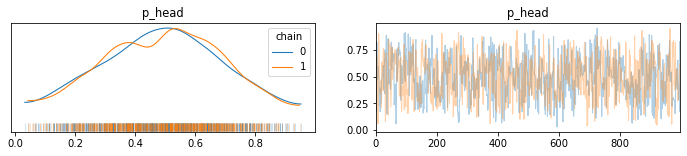

In [7]:
az.plot_trace(trace, rug=True, rug_kwargs={"alpha": .2}, compact=False, legend=True)

<AxesSubplot:title={'center':'p_head'}>

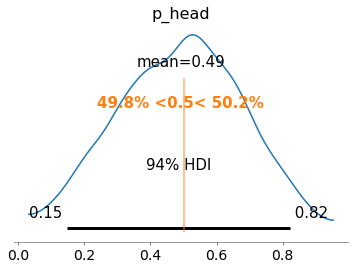

In [8]:
az.plot_posterior(trace, ref_val=0.5)